# Importing the required Libraries

In [1]:
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import tensorflow as tf
from tensorflow import keras



In [3]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten
from keras.models import Model

In [4]:
from keras.datasets import mnist

In [5]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adagrad

# Load the Data

In [6]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


C:\Users\range\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


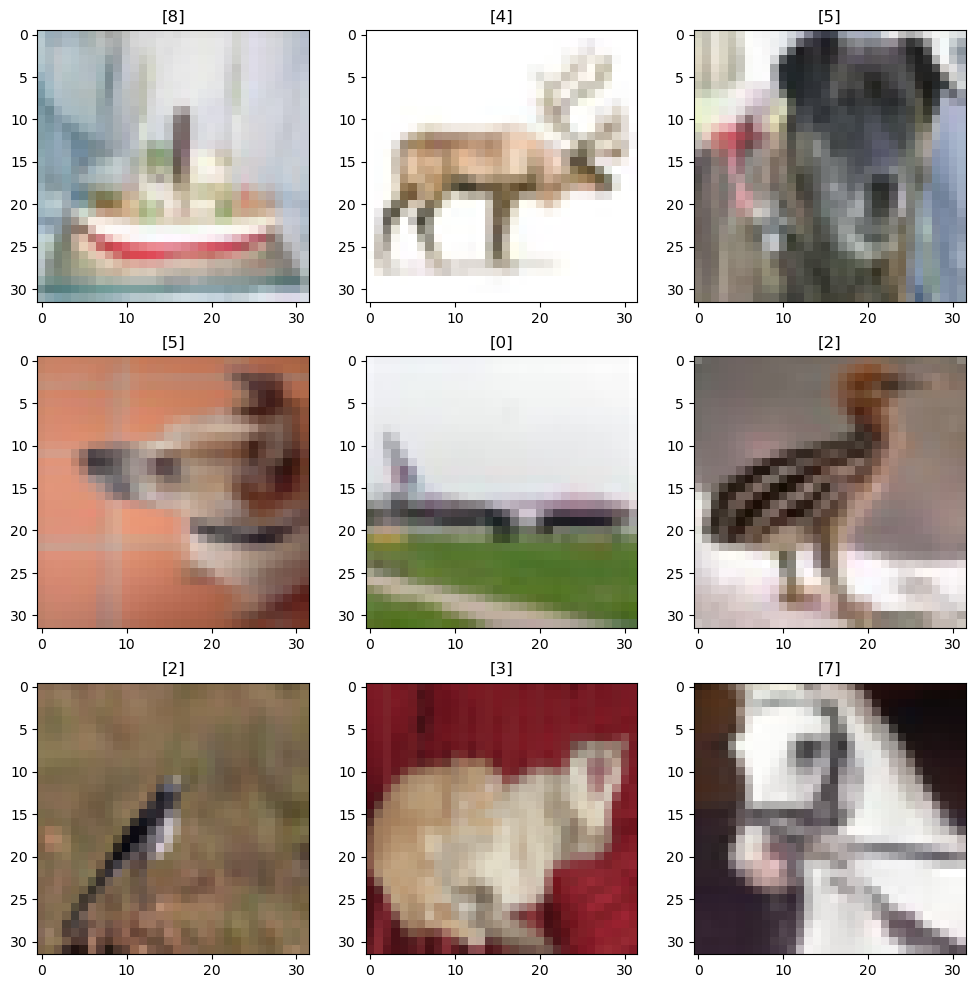

In [8]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

# Data Preprocessing

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)

In [9]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_ground, valid_ground = train_test_split(X_train,
                                                                X_train, 
                                                                test_size=0.2, 
                                                                random_state=13)

# Building the model - Experiment_SGD(without momentum)

In [12]:
TB = TensorBoard(log_dir=r"C:\Users\range\Downloads\archive (15)\dxt",histogram_freq=1)

In [13]:

encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(3072, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((32, 32, 3))(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

autoencoder.compile(loss='mean_squared_error', optimizer = SGD())

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground),callbacks=TB)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3072)              199680    
                                                                 
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
Total params: 400512 (1.53 MB)
Trainable params: 400512

In [14]:
%load_ext tensorboard
%tensorboard --logdir "C:\Users\range\Downloads\archive (15)\dxt"

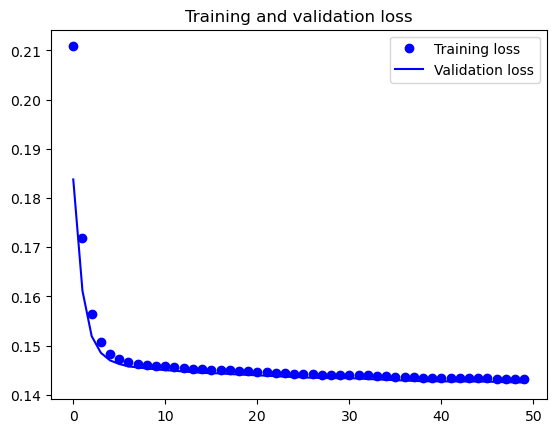

In [22]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Test Images


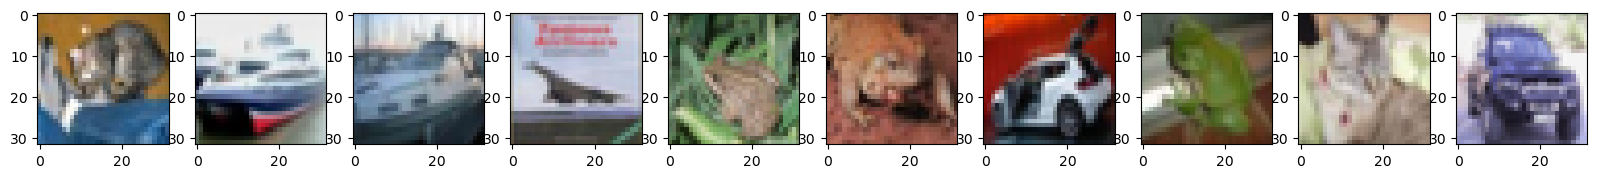

Compressed Image


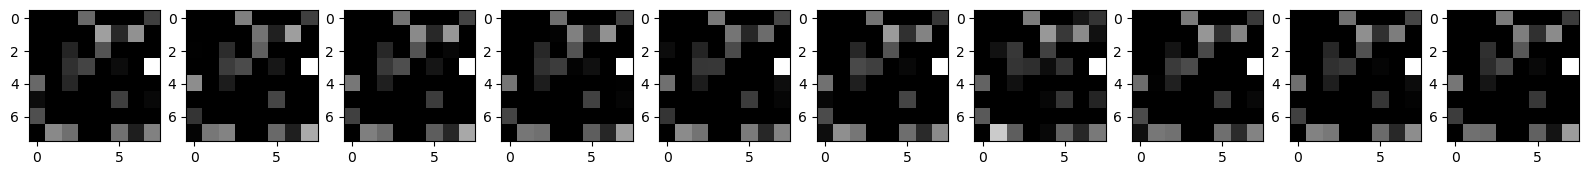

Reconstruction of Test Images


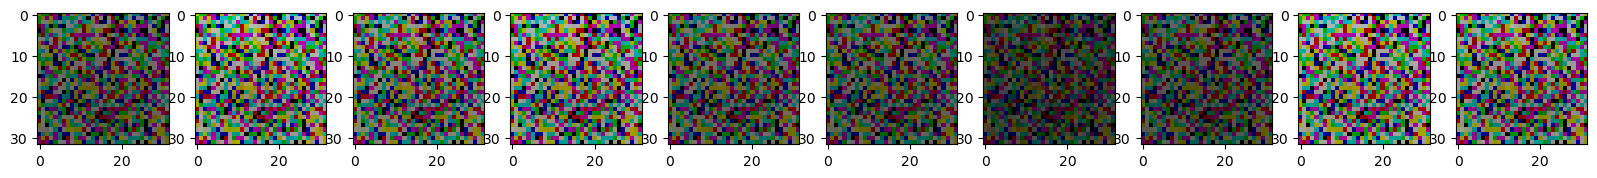

In [25]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((32, 32,3)),)
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)),)
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((32, 32,3)),)  
plt.show()

# Building the model - Experiment_SGD(with momentum)

In [10]:
TC = TensorBoard(log_dir=r"C:\Users\range\Downloads\archive (18)\dxd",histogram_freq=1)

In [12]:
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(3072, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((32, 32, 3))(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

autoencoder.compile(loss='mean_squared_error', optimizer = SGD(momentum=0.9))

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground),callbacks=TC)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3072)              199680    
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
Total params: 400512 (1.53 MB)
Trainable params: 400512

In [13]:
%reload_ext tensorboard
%tensorboard --logdir "C:\Users\range\Downloads\archive (18)\dxd"

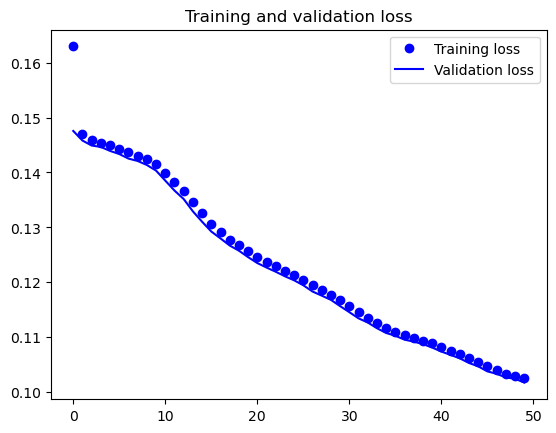

In [27]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Test Images


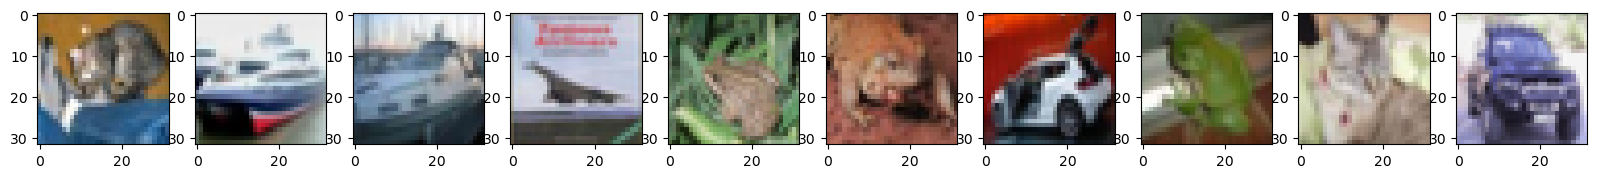

Compressed Image


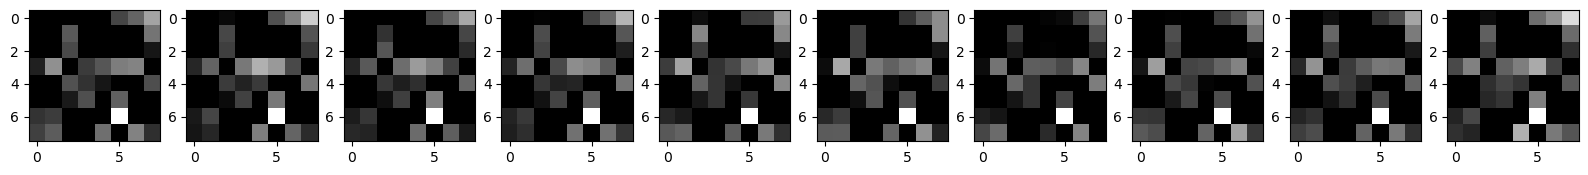

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction of Test Images


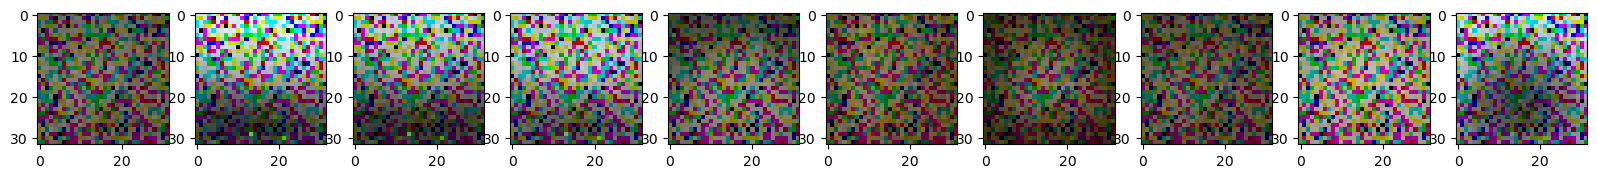

In [28]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((32, 32,3)),)
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)),)
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((32, 32,3)),)  
plt.show()

# Building the model - Experiment_RMSProp

In [10]:
TD = TensorBoard(log_dir=r"C:\Users\range\Downloads\archive (16)\fxx",histogram_freq=1)

In [11]:
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(3072, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((32, 32, 3))(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground),callbacks=TD)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3072)              199680    
                                                                 
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
Total params: 400512 (1.53 MB)
Trainable params: 400512

In [12]:
%reload_ext tensorboard
%tensorboard --logdir "C:\Users\range\Downloads\archive (16)\fxx"

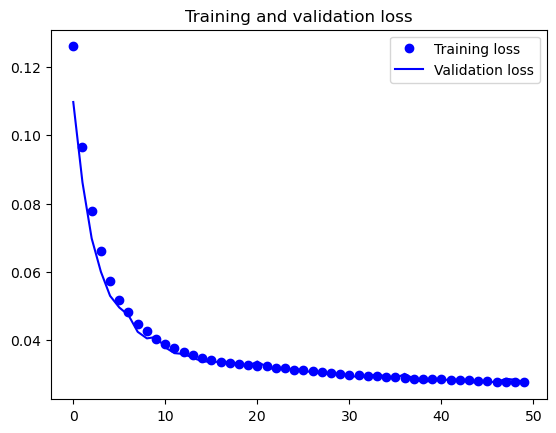

In [30]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Test Images


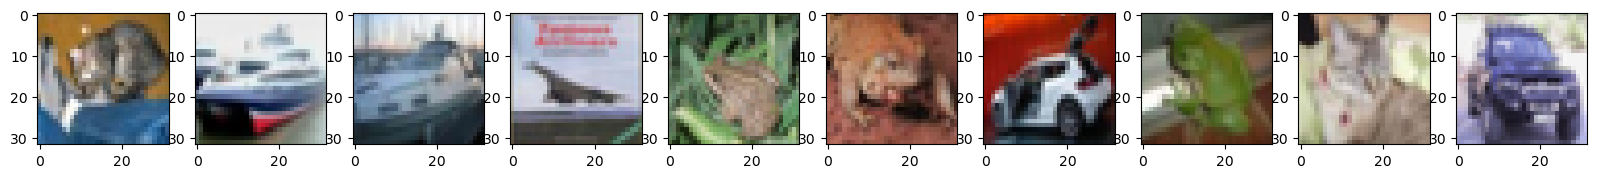

Compressed Image


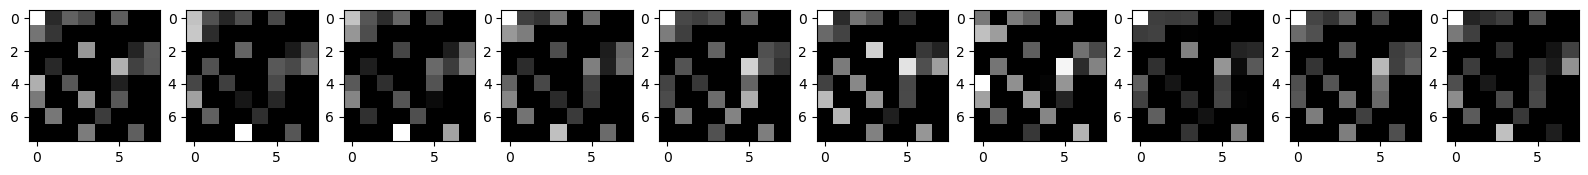

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction of Test Images


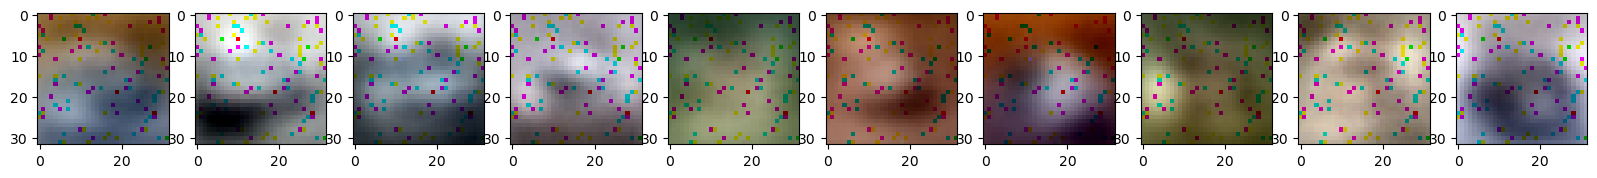

In [31]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((32, 32,3)), )
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), )
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((32, 32,3)), )  
plt.show()

# Building the model - Experiment_ADAM

In [10]:
TE = TensorBoard(log_dir=r"C:\Users\range\Downloads\archive (17)\bcv",histogram_freq=1)

In [12]:
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(3072, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((32, 32, 3))(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

autoencoder.compile(loss='mean_squared_error', optimizer = Adam())

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground),callbacks=TE)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3072)              199680    
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
Total params: 400512 (1.53 MB)
Trainable params: 400512

In [13]:
%reload_ext tensorboard
%tensorboard --logdir "C:\Users\range\Downloads\archive (17)\bcv"

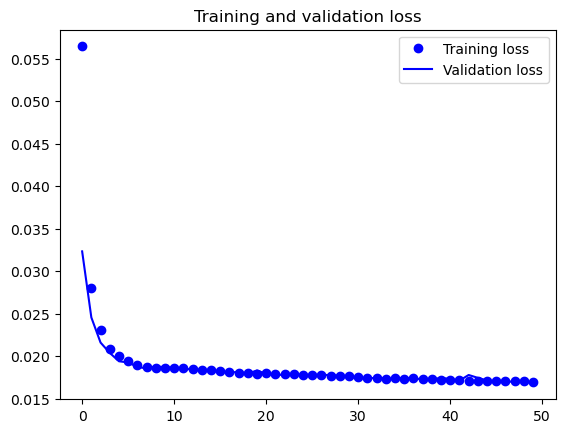

In [33]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Test Images


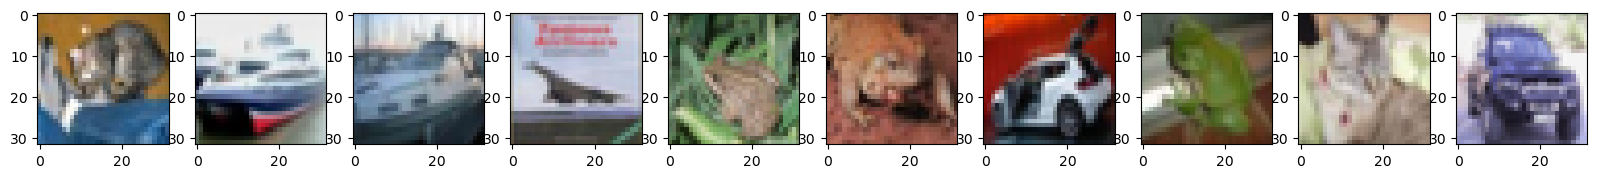

Compressed Image


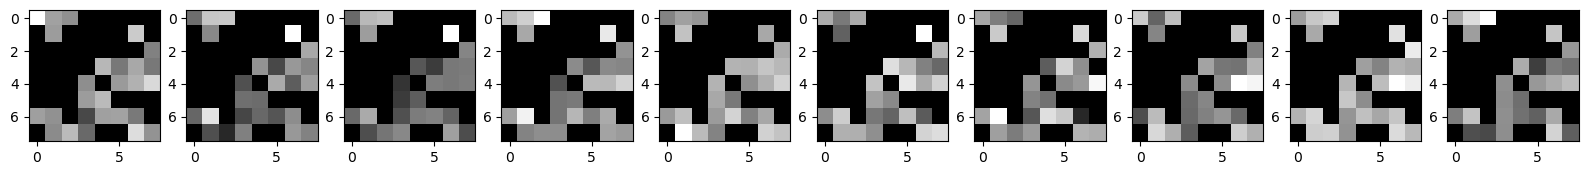

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction of Test Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


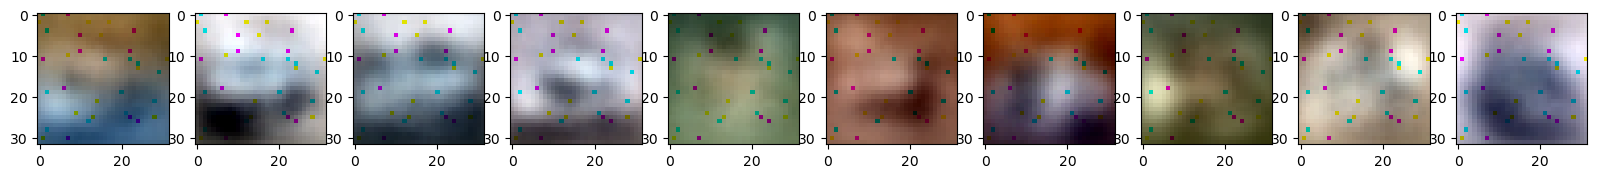

In [34]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((32, 32,3)), )
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)),)
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((32, 32,3)), )  
plt.show()